# Experiment 5: Reconstruction Limitations: Number of Views

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
results = pd.read_csv("../eval/TestEvaluation/mesh_eval_results.csv")

In [3]:
relevant_models = [
    "vh_1img",
    "vh_2img",
    "vh_3img",
    "vh_4img",
    "vh_5img",
    "vh_6img",
    "pix2vox_aug_1img",
    "pix2vox_aug",
    "pix2vox_aug_3img",
    "pix2vox_aug_4img",
    "pix2vox_aug_5img",
    "pix2vox_aug_6img",
    "pollen_augmentation1",
    "pollen_augmentation2",
    "pollen_augmentation3",
    "pollen_augmentation4",
    "pollen_augmentation5",
    "pollen_augmentation6",
    "refine_p2mpp_augmentation_2_inputs",
    "refine_p2mpp_augmentation_3_inputs",
    "refine_p2mpp_augmentation_4_inputs",
    "refine_p2mpp_augmentation_5_inputs",
    "refine_p2mpp_augmentation_6_inputs",
]

filtered = results[results["model"].isin(relevant_models)]

aggregated = filtered.groupby("model", as_index=False).agg(
    mean_chamfer         = ("chamfer",     "mean"),
    std_chamfer          = ("chamfer",     "std"),
    mean_fscore_1        = ("fscore_1",    "mean"),
    std_fscore_1         = ("fscore_1",    "std"),
    mean_fscore_2_5      = ("fscore_2_5",  "mean"),
    std_fscore_2_5       = ("fscore_2_5",  "std"),
    mean_fscore_5        = ("fscore_5",    "mean"),
    std_fscore_5         = ("fscore_5",    "std"),
    mean_iou             = ("voxel_iou",   "mean"),
    std_iou              = ("voxel_iou",   "std"),
)

aggregated

,model,mean_chamfer,std_chamfer,mean_fscore_1,std_fscore_1,mean_fscore_2_5,std_fscore_2_5,mean_fscore_5,std_fscore_5,mean_iou,std_iou
0,pix2vox_aug,0.059839,0.020741,0.166688,0.060798,0.603350,0.151200,0.848221,0.121432,0.713982,0.176484
1,pix2vox_aug_1img,0.062417,0.019690,0.148271,0.047837,0.576603,0.127046,0.831607,0.114709,0.723872,0.108581
2,pix2vox_aug_3img,0.055425,0.018622,0.178316,0.069002,0.635574,0.142980,0.864877,0.110430,0.738976,0.129375
3,pix2vox_aug_4img,0.057382,0.021190,0.169360,0.069673,0.615489,0.167863,0.855387,0.130177,0.765842,0.093510
4,pix2vox_aug_5img,0.055976,0.016643,0.167743,0.054462,0.612202,0.135544,0.866543,0.101334,0.754659,0.090891
5,pix2vox_aug_6img,0.054871,0.018306,0.176082,0.061838,0.639405,0.138574,0.868861,0.115294,0.746577,0.119281
6,pollen_augmentation1,0.059112,0.011685,0.171571,0.046096,0.612385,0.075098,0.841990,0.076052,0.755112,0.118874
7,pollen_augmentation2,0.043322,0.013381,0.259836,0.088822,0.762052,0.122709,0.909808,0.083156,0.827635,0.065013
8,pollen_augmentation3,0.040660,0.015760,0.285657,0.115463,0.799604,0.153368,0.912250,0.095097,0.836825,0.075932
9,pollen_augmentation4,0.040023,0.014022,0.288918,0.130630,0.787759,0.161595,0.917503,0.078587,0.820266,0.088936


In [4]:
import matplotlib.pyplot as plt
import re

def plot_model_metrics(df, *, title=None):
    """
    Create a 1x3 panel with (1) Chamfer, (2) F-Score @ 1 / 2.5 / 5 %, (3) IoU
    versus the number of input images.

    Parameters
    ----------
    df : pandas.DataFrame
        Must contain columns:
        model, mean_chamfer, std_chamfer, mean_fscore_1, std_fscore_1,
        mean_fscore_2_5, std_fscore_2_5, mean_fscore_5, std_fscore_5,
        mean_iou, std_iou
    title : str, optional
        Figure‑level title; if omitted, the first `model` entry (minus its
        trailing “_Ximg/…”) is used.
    """

    if df.empty:
        raise ValueError("`df` is empty – nothing to plot.")

    # 1. Derive the "# input images" column
    work = (
        df.copy()
          .assign(n_images=df["model"].str.extract(r'(\d+)(?!.*\d)').astype(float))
          .dropna(subset=["n_images"])
          .astype({"n_images": int})
          .sort_values("n_images")
    )

    if work.empty:
        raise ValueError(
            "Could not find an integer suffix in any of the supplied model "
            "names. Check that the model strings end in '_<N>img' or similar."
        )

    # 2. Basic formatting helpers
    if title is None:
        base_name = re.sub(r'[_-]\d+.*$', '', str(work.iloc[0]["model"]))
        title = base_name.replace('_', ' ').title()

    # 3. The figure
    fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharex=True)
    fig.suptitle(title)
    
    # (a) Chamfer
    axes[0].errorbar(
        work["n_images"], work["mean_chamfer"], yerr=work["std_chamfer"],
        fmt="o-"
    )
    axes[0].set(
        xlabel="Number of Images",
        ylabel="Chamfer",
        title="Chamfer Distance",
    )
    axes[0].grid(True)

    # (b) F‑Score
    axes[1].errorbar(
        work["n_images"], work["mean_fscore_1"], yerr=work["std_fscore_1"],
        fmt="o-", label="τ = 1%")
    axes[1].errorbar(
        work["n_images"], work["mean_fscore_2_5"], yerr=work["std_fscore_2_5"],
        fmt="s-", label="τ = 2.5%")
    axes[1].errorbar(
        work["n_images"], work["mean_fscore_5"], yerr=work["std_fscore_5"],
        fmt="^-", label="τ = 5%")
    axes[1].set(
        xlabel="Number of Images",
        ylabel="F-Score",
        title="F-Score",
    )
    axes[1].legend()
    axes[1].grid(True)

    # (c) IoU
    axes[2].errorbar(
        work["n_images"], work["mean_iou"], yerr=work["std_iou"],
        fmt="o-"
    )
    axes[2].set(
        xlabel="Number of Images",
        ylabel="IoU",
        title="Voxel IoU",
    )
    axes[2].grid(True)

    plt.tight_layout()
    plt.show()


In [19]:
import os, re, sys
from pathlib import Path
import numpy as np
import trimesh, matplotlib.pyplot as plt
import fast_simplification

sys.path.append("../")

from TestEvaluationPipeline.mesh_utils import MeshUtils

# ------------------------------------------------------------------
# helpers ------------------------------------------------------------------

_VIEW_PATTERNS = [
    re.compile(r"_([1-6])img"),          # vh_3img           → 3
    re.compile(r"_([1-6])_inputs?"),     # ..._4_inputs      → 4
    re.compile(r"augmentation([1-6])"),  # pollen_augmentation5 → 5
]

def _extract_view_count(folder_name: str) -> int:
    # Special-case: your 2-view pix2vox folder has no explicit number
    if Path(folder_name).name == "pix2vox_aug":
        return 2

    for pat in _VIEW_PATTERNS:  # the three regexes I provided earlier
        m = pat.search(folder_name)
        if m:
            return int(m.group(1))
    raise ValueError(f"Cannot infer view count from '{folder_name}'")


def find_mesh_file(model_dir, base_name, exts=(".stl", ".obj")):
    """
    Look for a file in model_dir whose name contains base_name and ends with one of the given extensions.
    """
    base = Path(model_dir)
    # try scanning for any file matching pattern *base_name*ext
    for ext in exts:
        pattern = f"*{base_name}*{ext}"
        matches = list(base.glob(pattern))
        if matches:
            return str(matches[0])
    # fallback to any file containing base_name
    globbed = list(base.glob(f"*{base_name}*.*"))
    if globbed:
        return str(globbed[0])
    raise FileNotFoundError(f"No mesh file containing '{base_name}' in '{model_dir}'")


def set_axes_equal_and_zoom(ax, mesh, zoom=1.0):
    xyz = mesh.vertices
    mins = xyz.min(axis=0)
    maxs = xyz.max(axis=0)
    center = (mins + maxs) / 2
    half = (maxs - mins).max() * zoom / 2

    ax.set_xlim(center[0] - half, center[0] + half)
    ax.set_ylim(center[1] - half, center[1] + half)
    ax.set_zlim(center[2] - half, center[2] + half)
    ax.set_box_aspect((1, 1, 1))


# ------------------------------------------------------------------
# main function ----------------------------------------------------

def plot_view_ablation(
    basenames,                       # list[str]  – e.g. the five pollen names
    model_dirs,                      # iterable[str]  – *only* the recon folders
    gt_dir,                          # str  – folder that holds the GT meshes
    exts=(".stl", ".obj"),
    zoom=0.8,
    figsize=(14, 8),
    color=None,
):
    """
    Qualitative comparison of ONE reconstruction model trained with
    different numbers of input views.

    Parameters
    ----------
    basenames : list[str]
        STL / OBJ base names *without* extension.
    model_dirs : iterable[str]
        Folders that contain the predicted meshes. They may be in
        arbitrary order; the function sorts them by extracted view count.
        Typical call:  aggregated[aggregated['model'].str.contains("vh_")]['model']
    gt_dir : str
        Folder that contains the ground‑truth meshes.
    exts : (".stl", ".obj"), optional
        Extensions to look for when locating a mesh.
    zoom : float, optional
        <1 zooms in; >1 zooms out (same semantics as your earlier code).
    figsize : tuple, optional
        Passed straight to `plt.subplots`.
    color : matplotlib‑style color spec or None
        If None a default colormap is used; otherwise every trisurf is tinted
        with this constant color.

    Notes
    -----
    * Works for 1‑to‑6 or 2‑to‑6 regimes.  Missing view counts are simply skipped.
    * Extremely dense predictions (>10 000 verts) are simplified
      exactly like in your existing routine.
    """
    # ------------------------------------------------------------------
    # 0.  collect & sort ------------------------------------------------
    view_to_dir = {}
    for d in model_dirs:
        v = _extract_view_count(Path(d).name)
        if v in view_to_dir:
            raise ValueError(f"Duplicate directory for {v}‑view model: {d}")
        view_to_dir[v] = d
    view_counts = sorted(view_to_dir)          #  [1,2,3,4,5,6]  or  [2,3,4,5,6]

    n_rows = len(basenames)
    n_cols = 1 + len(view_counts)              # GT + each view count

    # ------------------------------------------------------------------
    # 1.  canvas --------------------------------------------------------
    fig, axes = plt.subplots(
        n_rows,
        n_cols,
        subplot_kw={"projection": "3d"},
        figsize=figsize,
        squeeze=False,
    )

    col_titles = ["GT"] + [
        f"{v} view" if v == 1 else f"{v} views" for v in view_counts
    ]

    # ------------------------------------------------------------------
    # 2.  iterate meshes ------------------------------------------------
    for r, base in enumerate(basenames):

        # ---- load once (GT) to align everything else ---------------
        gt_path = find_mesh_file(gt_dir, base, exts)
        gt_mesh = trimesh.load(gt_path)

        for c in range(n_cols):
            ax = axes[r, c]
            ax.set_axis_off()
            ax.grid(False)
            for pane in (ax.xaxis, ax.yaxis, ax.zaxis):
                pane.pane.fill = False
                pane.pane.set_edgecolor("none")

            if c == 0:   # GT column
                mesh = gt_mesh

            else:        # prediction columns
                v = view_counts[c - 1]
                pred_path = find_mesh_file(view_to_dir[v], base, exts)
                pred = trimesh.load(pred_path)

                # optional simplification for very large meshes
                if pred.vertices.shape[0] >= 10_000:
                    new_v, new_f = fast_simplification.simplify(
                        points=pred.vertices.view(np.ndarray),
                        triangles=pred.faces.view(np.ndarray),
                        target_reduction=0.999999,
                    )
                    pred = trimesh.Trimesh(vertices=new_v, faces=new_f)

                # rigid ICP alignment
                aligned, _ = MeshUtils.align_icp(pred, gt_mesh)
                mesh = trimesh.Trimesh(vertices=aligned.vertices, faces=pred.faces)

            # ---- draw ------------------------------------------------
            ax.plot_trisurf(
                mesh.vertices[:, 0],
                mesh.vertices[:, 1],
                mesh.vertices[:, 2],
                triangles=mesh.faces,
                color=color,
            )

            # first row → add column title
            if r == 0:
                ax.set_title(col_titles[c], pad=6)

            set_axes_equal_and_zoom(ax, mesh, zoom=zoom)

    plt.tight_layout()
    plt.show()


In [20]:
filenames = [
    "17781_Common_thyme_Thymus_vulgaris_pollen_grain",
    "17803_Ox-eye_daisy_Leucanthemum_vulgare_pollen_grain",
    "21555_Hard_rush_Juncus_inflexus_pollen_grain_shrunken",
    "21188_Meadow_goats_beard_Tragopogon_pratensis_pollen_grain",
    "17878_Alder_Alnus_sp_pollen_grain_pentaporate",
]

### Visual Hull

In [21]:
visual_hull = aggregated[aggregated['model'].str.contains("vh_")]

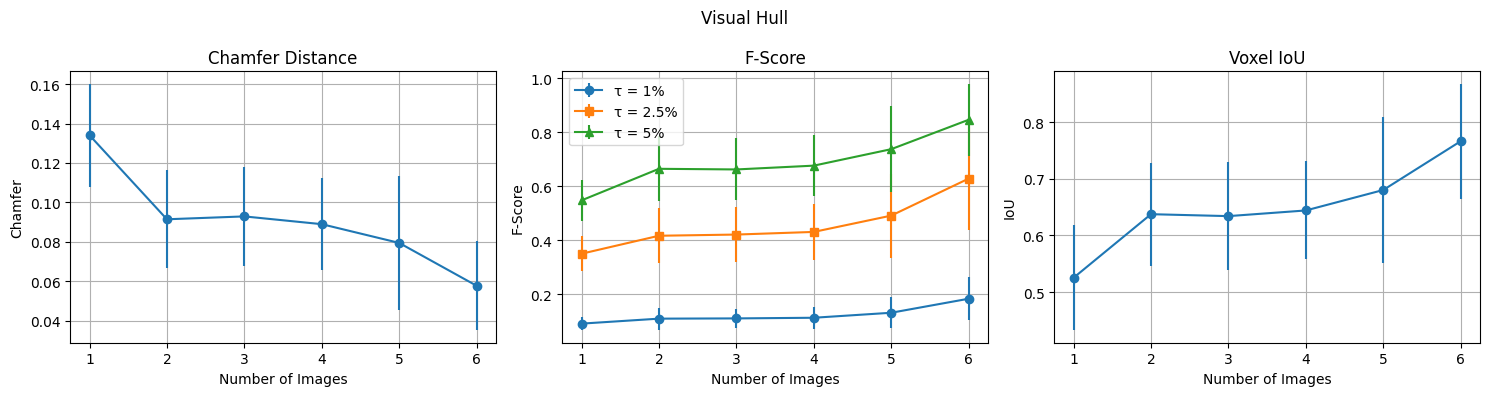

In [22]:
plot_model_metrics(visual_hull, title="Visual Hull")

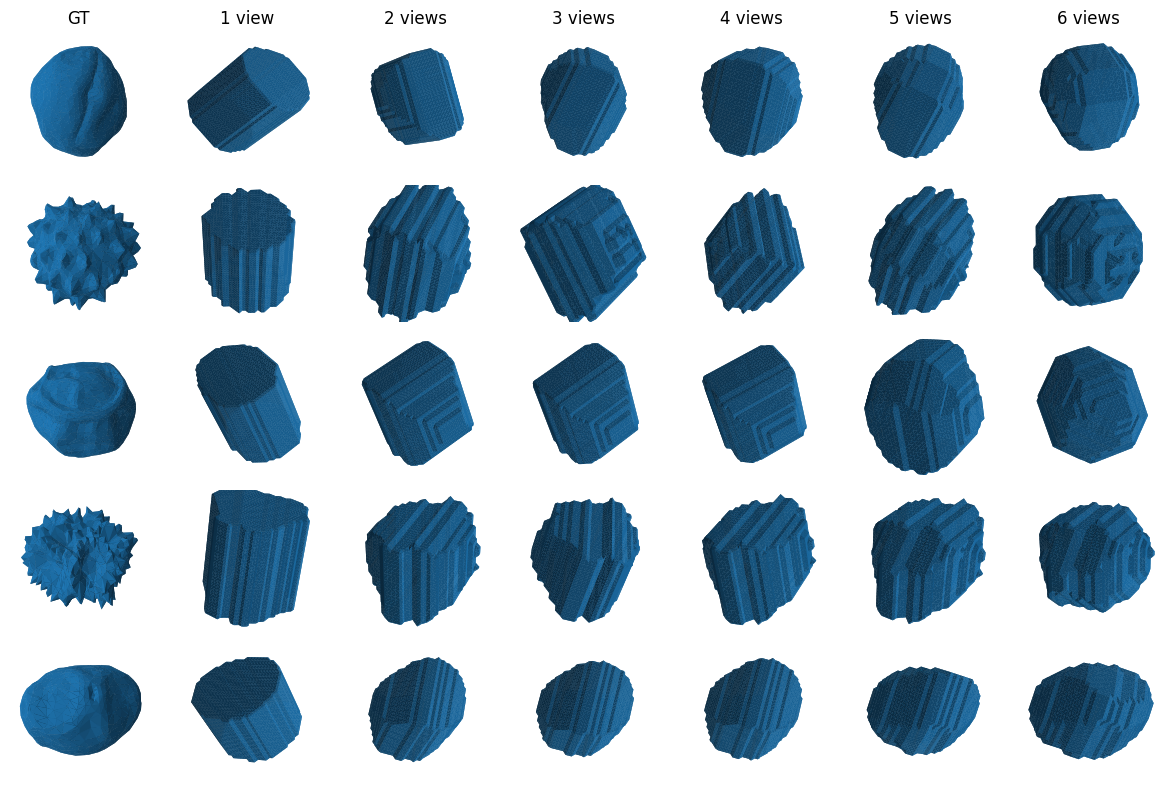

In [33]:
vh_subset = aggregated[aggregated["model"].str.contains(r"\bvh_\dimg\b")]["model"].apply(
    lambda x: f"../TestEvaluationPipeline/data/{x}"
)

plot_view_ablation(
    basenames = filenames,
    model_dirs = vh_subset,
    gt_dir     = "../data/processed/meshes",
    zoom       = 0.7,
    figsize    = (12, 8),
)

### Pix2Vox

In [24]:
pix2vox = aggregated[aggregated['model'].str.contains("pix2vox_aug")]

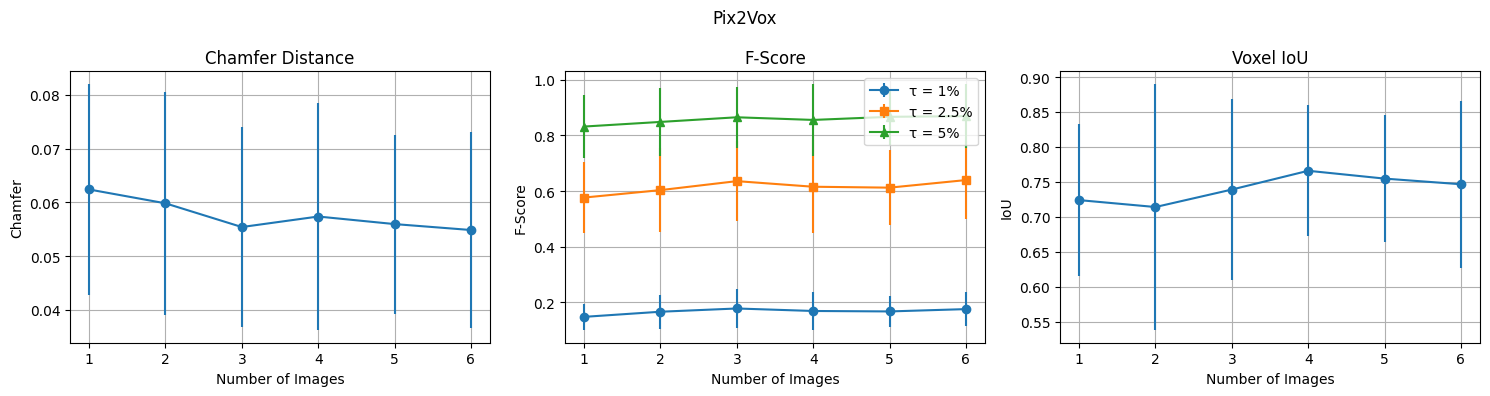

In [25]:
plot_model_metrics(pix2vox, title="Pix2Vox")

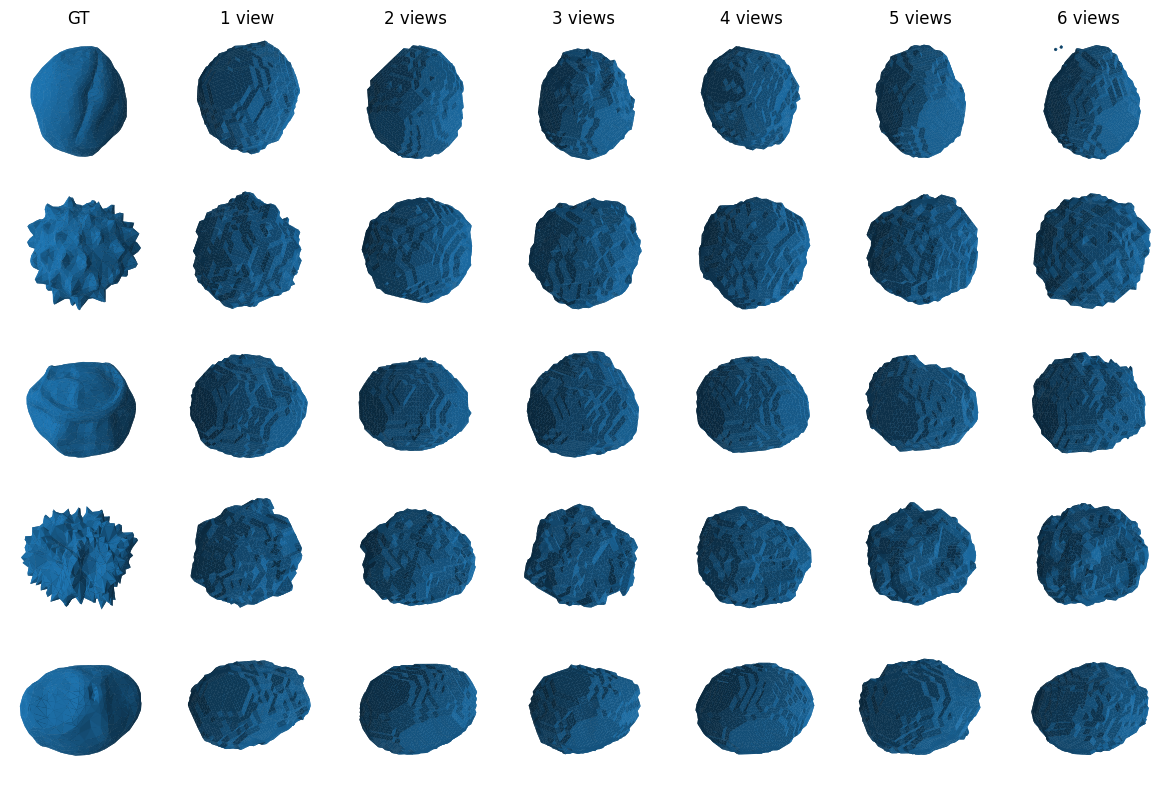

In [34]:
pix2vox_subset = aggregated[aggregated['model'].str.contains("pix2vox")]["model"].apply(
    lambda x: f"../TestEvaluationPipeline/data/{x}"
)

plot_view_ablation(
    basenames = filenames,
    model_dirs = pix2vox_subset,
    gt_dir     = "../data/processed/meshes",
    zoom       = 0.7,
    figsize    = (12, 8),
)

### Pixel2Mesh++

In [30]:
pixel2mesh = aggregated[aggregated['model'].str.contains("refine_p2mpp_augmentation")]

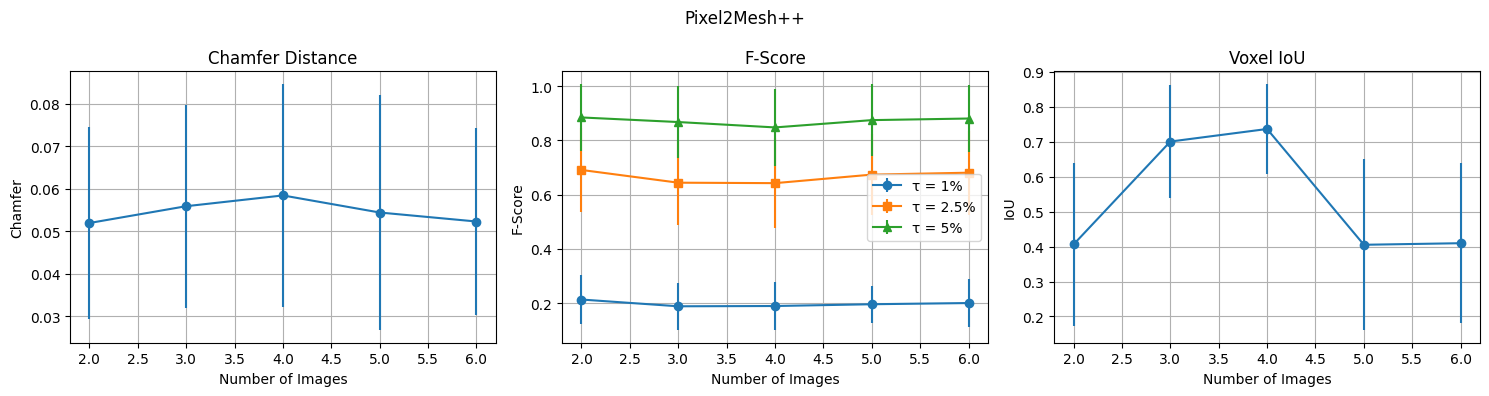

In [31]:
plot_model_metrics(pixel2mesh, title="Pixel2Mesh++")

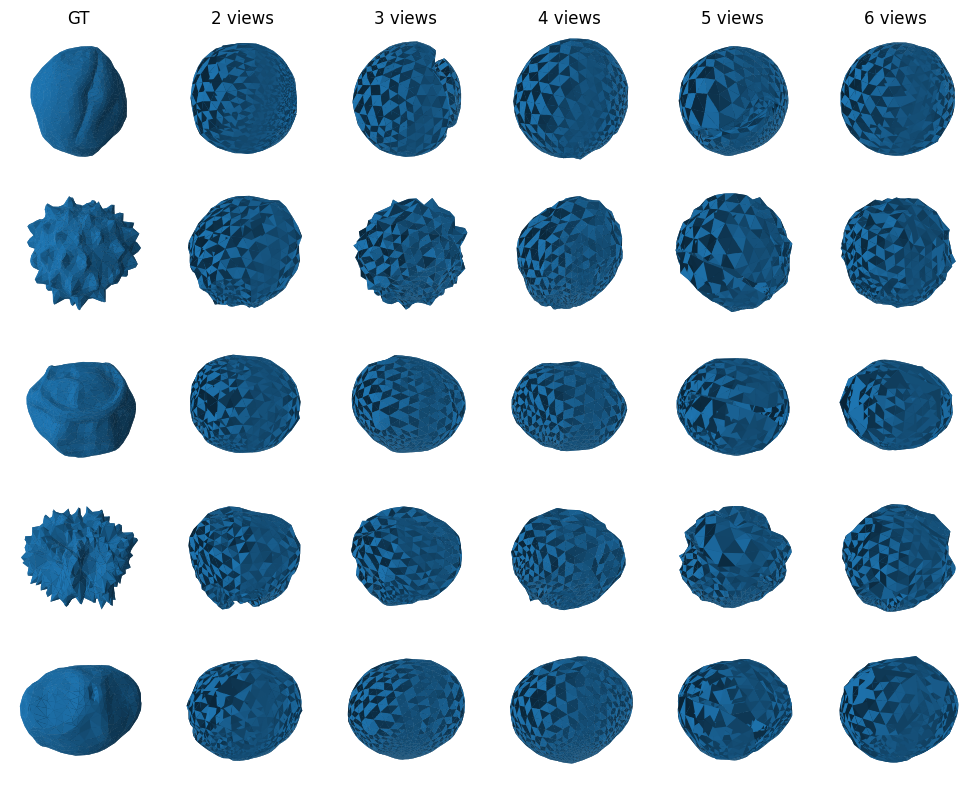

In [35]:
p2mpp_subset = aggregated[aggregated['model'].str.contains("p2mpp")]["model"].apply(
    lambda x: f"../TestEvaluationPipeline/data/{x}"
)

plot_view_ablation(
    basenames = filenames,
    model_dirs = p2mpp_subset,
    gt_dir     = "../data/processed/meshes",
    zoom       = 0.7,
    figsize    = (10, 8),
)

### PixelNeRF

In [32]:
pixelnerf = aggregated[aggregated['model'].str.contains("pollen_augmentation")]

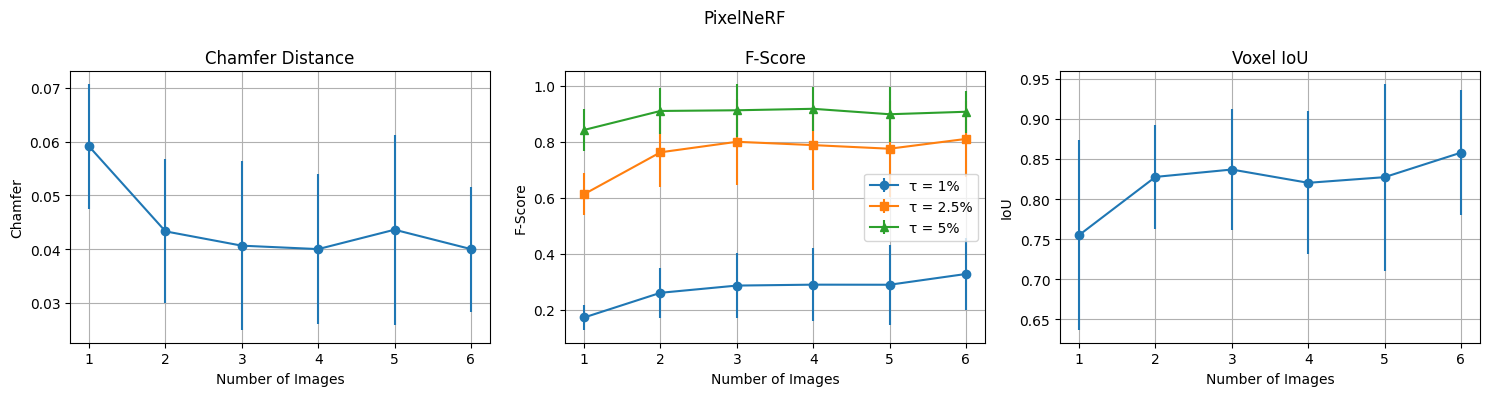

In [33]:
plot_model_metrics(pixelnerf, title="PixelNeRF")

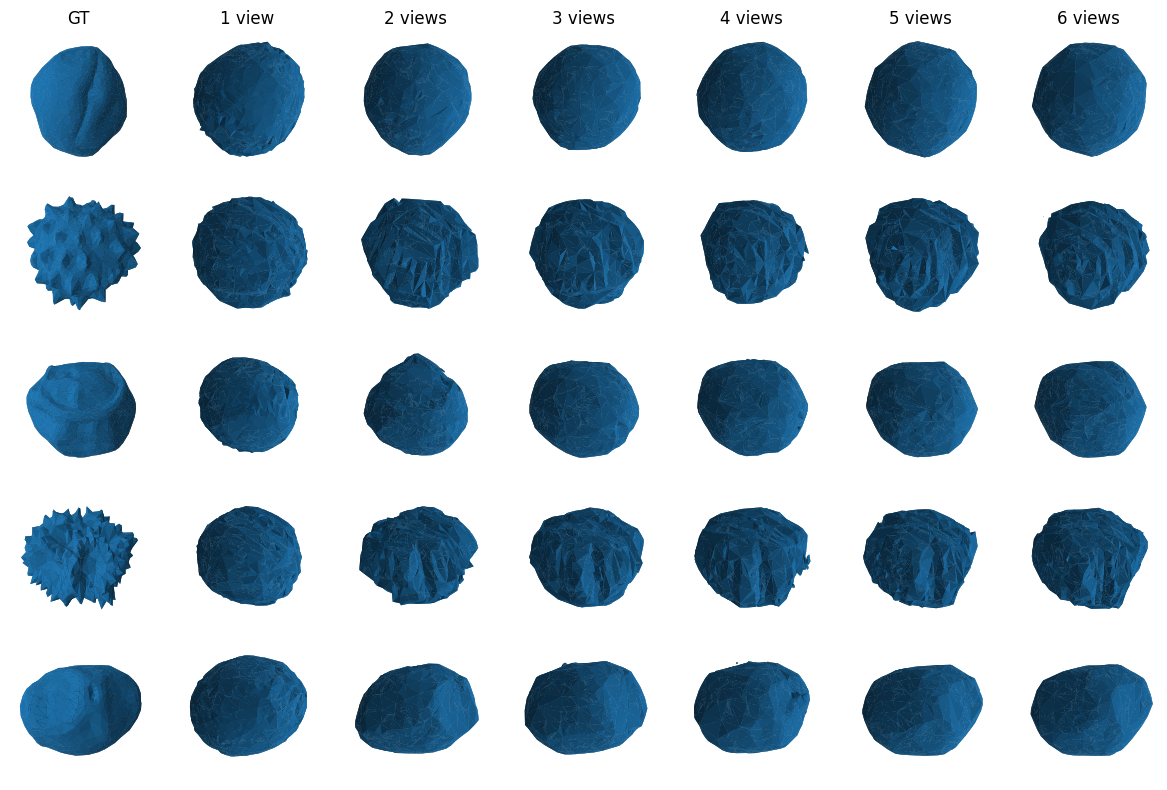

In [36]:
pixelnerf_subset = aggregated[aggregated['model'].str.contains("pollen_augmentation")]["model"].apply(
    lambda x: f"../TestEvaluationPipeline/data/{x}"
)

plot_view_ablation(
    basenames = filenames,
    model_dirs = pixelnerf_subset,
    gt_dir     = "../data/processed/meshes",
    zoom       = 0.7,
    figsize    = (12, 8),
)